# Instacart Exploratory Data Analysis 
---
# Introduction <a id='intro'></a>
---

In this project we will be analyzing the dataset of InstaCart for the year 2017. InstaCart became a popular application consumers used to conveniently shop for their groceries. 

The goal of this project is to give a report on customers' shopping habits.

__Stages__:


The data we'll be analyzing is stored in the following files (found in this repo within the `datasets` directory):

instacart_orders.csv

products.csv

order_products.csv

aisles.csv

departments.csv

There's limited information regarding the quality of the data so we will view and make any necessary changes to facilitate our analysis.

We will first identify any issues with the quality of the data and decide how to address them. Once the data is cleaned up, we will answer questions regarding customer shopping habits using the data we've gathered.
 
This project consists of the following three stages:
 1. Data overview
 2. Data preprocessing
 3. Data analysis

---
## Data Overview
---

In [87]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading `orders` dataset
orders_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_2/datasets/instacart_orders.csv', sep=';')

# Checking overview of data types, columns names, and size
orders_df.info()

# Getting sample of the dataset
orders_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


The dataframe includes 6 columns with values that are mainly integer types. The only exception is the values in column `'days_since_last_order'` (float64 type) which should be converted to int64

In [3]:
# Loading ` products` dataset
products_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_2/datasets/products.csv', sep=';')

# Viewing dataset info
products_df.info()

# Viewing sample of dataset
products_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


This dataset 4 columns and has mostly int64 data type values. The only exception is `'product_name'` (object type). `department_id` could be changed to category type to minimize space and increase efficiency.

In [4]:
# Loading `aisles` data
aisles_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_2/datasets/aisles.csv', sep= ';')

# Getting info on the dataset
aisles_df.info()

# Getting sample from dataset
aisles_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


The dataframe consists of 2 columns: `'aisle_id'` (int64 type) and `'aisle'` (object type)

In [5]:
# Loading `departments` data
depts_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_2/datasets/departments.csv', sep=';')

# Getting departments info
depts_df.info()

# Viewing sample of the dataset
depts_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


The dataframe consists of 2 columns: `'department_id'` (int64 type) and `'department'` (object type)

In [6]:
# Loading `order_products` dataset 
order_prod_df = pd.read_csv('~/Triple_Ten_Projects/Sprint_2/datasets/order_products.csv', sep=';')

# Viewing dataset info
order_prod_df.info()

# Getting sample of data
order_prod_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1


The dataframe consists of 4 columns mostly consisting of int64 values. The only exception is `'add_to_cart_order'` (float64 type) which should be converted to int64 type

According to the data dictionary for these datasets:

`'instacart_orders.csv`': each row corresponds to one order on the Instacart app
- 'order_id': ID number that uniquely identifies each order
- 'user_id': ID number that uniquely identifies each customer account
- 'order_number': the number of times this customer has placed an order
- 'order_dow': day of the week that the order placed (which day is 0 is uncertain)
- 'order_hour_of_day': hour of the day that the order was placed
- 'days_since_prior_order': number of days since this customer placed their previous order

`'products.csv'`: each row corresponds to a unique product that customers can buy
- 'product_id': ID number that uniquely identifies each product
- 'product_name': name of the product
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'department_id': ID number that uniquely identifies each grocery department category

`'order_products.csv'`: each row corresponds to one item placed in an order
- 'order_id': ID number that uniquely identifies each order
- 'product_id': ID number that uniquely identifies each product
- 'add_to_cart_order': the sequential order in which each item was placed in the cart
- 'reordered': 0 if the customer has never ordered this product before, 1 if they have

`'aisles.csv'`
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'aisle': name of the aisle

`'departments.csv'`
- 'department_id': ID number that uniquely identifies each grocery department category
- 'department': name of the department

 
We can see immediately 2 issues with the datasets:
1. There are some missing values in a few columns
2. The data types for `'days_since_prior_order'` and `'add_to_cart_order'` seem like they should be int64 types.

We will assess and see if and how we will address these issues.


---
## Data Preprocessing
---

### `orders` DataFrame
---

In [7]:
# Instantiating ransome state value
state = 42

# Viewing random sample rows
orders_df.sample(3, random_state = state)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
478011,187515,84759,1,2,15,NaN
176737,14154,184924,41,2,15,3.0
402189,1978043,151955,21,1,23,7.0


In [8]:
# Checking for any missing values
orders_df.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [9]:
# Isolating rows with missing values for quick description
orders_df[orders_df["days_since_prior_order"].isna()].describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,2.881900e+04,28819.000000,28819.0,28819.000000,28819.000000,0.0
mean,1.707113e+06,103307.252715,1.0,2.753774,13.625629,NaN
std,9.878431e+05,59349.069991,0.0,2.073522,4.210852,NaN
min,2.000000e+01,2.000000,1.0,0.000000,0.000000,NaN
25%,8.507765e+05,51802.500000,1.0,1.000000,11.000000,NaN
50%,1.709131e+06,103366.000000,1.0,3.000000,14.000000,NaN
75%,2.556388e+06,154637.500000,1.0,5.000000,17.000000,NaN
max,3.421077e+06,206201.000000,1.0,6.000000,23.000000,NaN


We can associate the missing values in `"days_since_prior_order"` to the customers' first order as the `"order_number"` columns stats suggests.

Missing values will be replaces with "first order" string values.

In [10]:
# Filling missing values with "first order" string values
orders_df["days_since_prior_order"] = orders_df["days_since_prior_order"].fillna("first order")

In [11]:
# Checing for duplicates
print(f"Duplicates found: {orders_df.duplicated().sum()}")

Duplicates found: 15


In [12]:
# Viewing duplicate rows
orders_df[orders_df.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,first order
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,first order


All duplicate rows occurred on a Wednesday at 2AM. Not sure if that has a coincedence but worth a look if it becomes an impedement.

Nonetheless, those rows will be removed as they corrupt the data.

In [13]:
# Dropping duplicates
orders_df = orders_df.drop_duplicates()

# Confimring changes
print(f"Duplicates: {orders_df.duplicated().sum()}")

Duplicates: 0


Verifying the values in `'order_hour_of_day'` and `'order_dow'` in the `orders` table are sensible. Confirm `'order_hour_of_day'` is in 0-23 range and `'order_dow'` is within the 0-6 value range.

In [106]:
# Printing 'order_dow' and 'order_hour_of_day' min /max 
print(f"Order dow min, max: {orders_df['order_dow'].min()},{orders_df['order_dow'].max()}")
print(f"Order hour min, max: {orders_df["order_hour_of_day"].min()},{orders_df["order_hour_of_day"].max()}")

Order dow min, max: 0,6
Order hour min, max: 0,23


### `products` DataFrame
---

In [14]:
products_df.sample(3, random_state=42)

,product_id,product_name,aisle_id,department_id
11902,11903,Beef Chuck Roast,6,2
4162,4163,Spanish Rice Pilaf Mix,4,9
17736,17737,Gluten Free Red Velvet & Tuxedo Cupcake Duo,8,3


In [15]:
# Checking for missing values
products_df['product_name'].isna().sum()

1258

In [16]:
# Viewing rows with missing `"product_name"` values
products_df[products_df["product_name"].isna()][["aisle_id","department_id"]].value_counts()

aisle_id  department_id
100       21               1258
Name: count, dtype: int64

All products with `"product_name"` values missing are found to share the same department and aisle. 

I'm sure customers are not buying unknown products, so could be an issue with the data entry/collection. Will just assign them "unknown" values.

In [17]:
# Filling unknown values
products_df["product_name"] = products_df["product_name"].fillna("unknown")

# Confirming changes
products_df.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [18]:
# Checking for duplicates
products_df.duplicated().sum()

0

In [19]:
# Checking for duplicates
products_df['product_id'].duplicated().sum()

0

In [20]:
# Convering `product_name` values to lower case and checking for any duplicates in the event of any implicit duplicates
products_df['product_name'].str.lower().duplicated().sum()

1361

We found there are 1361 total duplicates after changing the obects to lowercase, adding 103 duplicate values within the `"product_name"` values.

In [21]:
# Changing case of `product_name` values to address the duplicates
products_df['product_name'] = products_df['product_name'].str.lower()

# Checking "product_name" unique values 
print("Number of duplicate non-'unknown' values: ", 
      products_df[products_df["product_name"] != "unknown"]["product_name"].duplicated().sum()
)

Number of duplicate non-'unknown' values:  104


Only 104 of the 1361 duplicate values are not "unknown" values. These are likely products of different sizes or brands.

We'll leave these values as-is.

### `departments` DataFrame
---

In [22]:
depts_df.sample(3, random_state=state)

,department_id,department
0,1,frozen
17,18,babies
15,16,dairy eggs


In [23]:
# Checking for the number of duplicates
depts_df.duplicated().sum()

0

In [24]:
# Double checking for duplicates after changing to uniform case
depts_df['department'].str.lower().duplicated().sum()

0

In [25]:
# Checking for any implicit duplicates
depts_df["department"].value_counts()

department
frozen             1
meat seafood       1
deli               1
snacks             1
babies             1
household          1
dairy eggs         1
canned goods       1
breakfast          1
pantry             1
personal care      1
other              1
bulk               1
dry goods pasta    1
pets               1
beverages          1
international      1
alcohol            1
produce            1
bakery             1
missing            1
Name: count, dtype: int64

In [26]:
depts_df.isna().sum()

department_id    0
department       0
dtype: int64

This dataset looks clean but `"department"`dtype should be converted to category.

In [27]:
depts_df["department"] = depts_df["department"].astype("category")

# Confirming dtype change
depts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     category
dtypes: category(1), int64(1)
memory usage: 1.0 KB


### `aisles` DataFrame
---

In [28]:
# Getting sample rows
aisles_df.sample(3, random_state=state)

,aisle_id,aisle
127,128,tortillas flat bread
66,67,fresh dips tapenades
104,105,doughs gelatins bake mixes


In [29]:
# Checking for duplicates
aisles_df.duplicated().sum()

0

In [30]:
# Double checking for duplicates after changing case for uniformity
aisles_df['aisle'].str.lower().duplicated().sum()

0

In [31]:
# Checking for missing values
aisles_df.isna().sum()

aisle_id    0
aisle       0
dtype: int64

This dataset is clean with no issues.

### `order_products` DataFrame
---

In [32]:
# Sampling 3 rows
order_prod_df.sample(3,random_state=state)

,order_id,product_id,add_to_cart_order,reordered
1274557,2182877,36412,2.0,0
136271,1692632,49383,19.0,0
2327440,1054700,11520,9.0,1


In [33]:
# Checking for full duplicates
order_prod_df.duplicated().sum()

0

In [34]:
# Checking for missing values
order_prod_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Here we see 836 missing values for `"add_to_cart_order"`. Let's dive a bit deeper to see how we can address this issue.

In [35]:
# Printing rows with missing "add_to_order" values
order_prod_df[order_prod_df["add_to_cart_order"].isna()].sample(10, random_state=state)

,order_id,product_id,add_to_cart_order,reordered
3280063,1730767,18941,NaN,1
4443007,1968313,22497,NaN,0
1547289,102236,5699,NaN,0
4335860,1183255,46257,NaN,1
848750,2470674,20564,NaN,0
3737090,1529171,44116,NaN,0
4432922,1386261,8847,NaN,1
465478,1038146,1158,NaN,0
1402310,3308010,11576,NaN,1
2989638,293169,23233,NaN,1


Grouping thse orders by `"order_id"` and filtering for rows with missing `"add_to_cart_order"` might give us a bit more insight of whats going on with these observations.

In [36]:
# Indexing rows with missing "add_to_cart" values
missing_cart = order_prod_df[order_prod_df["add_to_cart_order"].isna()]["order_id"]

# Grouping by "order_id" 
grouped_orders = order_prod_df.groupby("order_id")["product_id"].count().reset_index().rename(
    columns = {
        "product_id" : "count"
    }
)

# Viewing statistical results of grouping
grouped_orders.query("order_id in @missing_cart")["count"].describe()

count     70.000000
mean      75.942857
std       12.898585
min       65.000000
25%       67.000000
50%       71.000000
75%       78.000000
max      127.000000
Name: count, dtype: float64

There are 70 unique orders that contained a missing `"add_to_cart_order"` value. The minimum number of items in that group of orders is 65 items and 127 items max. It appears there could be the result of a bug. We'll leave those missing values as is. No way to know how to address them meaningfully.

In [37]:
# Checking for any possible implicit duplicates
order_prod_df['order_id'].value_counts()

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64

In [38]:
# 3 row sample
products_df.sample(3, random_state=state)

,product_id,product_name,aisle_id,department_id
11902,11903,beef chuck roast,6,2
4162,4163,spanish rice pilaf mix,4,9
17736,17737,gluten free red velvet & tuxedo cupcake duo,8,3


There are 1258 missing values in the `'product_name'` column. We'll explore to get more details on those values.

All those values share the same `'aisle_id'` values. It looks like they all also share the same `'department_id'` values. Let's verify to see if our assumption is correct.

In [39]:
# Are all of the missing product names associated with department ID 21?
products_df[(products_df['product_name'].isna())&(products_df['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id


Our assumption is correct. All those values share the same `'department_id'` values. Let's go through the `'depts_df'` and `'aisle_df'`DataFrames to identify these aisle and department names.

In [40]:
# What is this ailse and department?
aisles_df[aisles_df['aisle_id']==100]

,aisle_id,aisle
99,100,missing


The `'aisle_id'` 100 name is also missing.

In [41]:
# Checking department 21 name
depts_df[depts_df['department_id']==21]

,department_id,department
20,21,missing


The `'department_id'` 21 value is missing as well.

In [42]:
# Filling missing department value with `Uknown` string values
products_df['product_name']=products_df['product_name'].fillna(value='unknown')

We'll clean this up by replacing those missing `'product_name'` values with <em>'Unknown'</em>

In [43]:
products_df['product_name'].isna().sum()

0

### Merging DataFrames
---

Now that our data is clean, it's time to merge all DataFrames for proper data analysis.

In [44]:
# Merging
df = orders_df.merge(
    order_prod_df,
    on = "order_id",
    how = "inner"
)

df = df.merge(
    products_df,
    on = "product_id",
    how = "inner"
)

df = df.merge(
    depts_df,
    on = "department_id",
    how = "inner"
)

df = df.merge(
    aisles_df,
    on = "aisle_id",
    how = "inner"
)

# Comfirming merge success
df.sample(3, random_state=state)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
1274557,1649083,64680,18,3,10,16.0,35132,2.0,1,cheese square crackers,78,19,snacks,crackers
136271,348697,150582,6,1,8,8.0,9327,19.0,0,garlic powder,104,13,pantry,spices seasonings
2327440,1825071,35109,6,6,12,13.0,14858,7.0,1,multigrain pita chips,107,19,snacks,chips pretzels


---
## Data Analysis
---

In [73]:
# Checking max values
print(f"Customer with the most orders in the sample: {df["order_number"].max()}")
print(f"Largest order consisted of {df["add_to_cart_order"].max()+1:.0f} items")
print(f"Average days since prior order turns out to be {df[df["days_since_prior_order"]!="first order"]["days_since_prior_order"].astype("int").mean().round():.0f} days")

Customer with the most orders in the sample: 99
Largest order consisted of 65 items
Average days since prior order turns out to be 11 days


Here we notice the largest order consists of 65 items when we retrieve all the max values of the `'order_products'` DataFrame

Let's see which are the busiest hours of the day

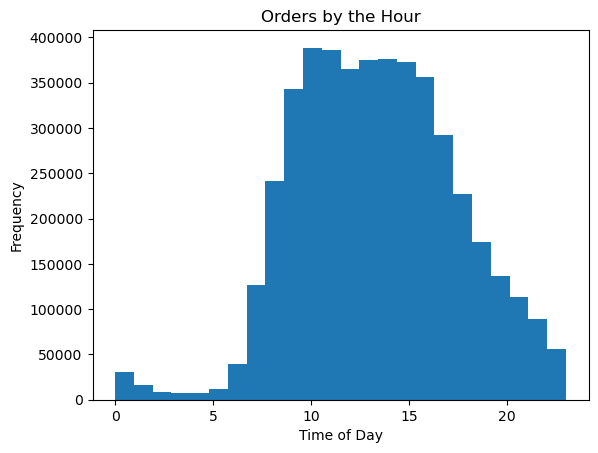

In [79]:
# Plotting distribution of values in `order_hour_of_day`
df['order_hour_of_day'].plot(bins=24, xlabel='Time of Day', title='Orders by the Hour', kind='hist')
plt.show()

11AM is the top hour customers place most orders. Peak hours are from 9AM to 4PM.

Overall the chart shows a normal distribution within the daytime hours. Not much activity between midnight and 6AM as most people are asleep.

In [83]:
df[df["order_hour_of_day"] < 7]["product_name"].value_counts().head(10)

product_name
banana                    1765
bag of organic bananas    1514
organic strawberries      1018
organic baby spinach       957
organic hass avocado       751
organic avocado            633
strawberries               576
organic whole milk         541
large lemon                524
organic raspberries        515
Name: count, dtype: int64

Late night hours are not sweettooth hours for these instacart customers. They are buying healthy and organic products are 7 of the top 10 most popular products amongst the late night shoppers.

We'll check distributions to see which day of week is most popular

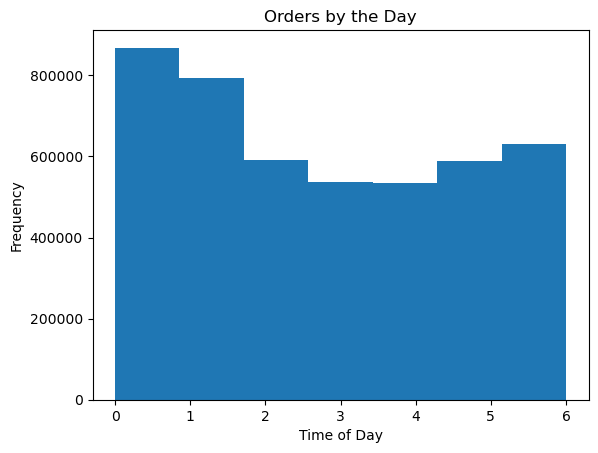

In [84]:
# Plotting distribution for `order_dow` values
df['order_dow'].plot(
    bins=7, 
    xlabel='Time of Day', 
    title='Orders by the Day', 
    kind='hist'
)

plt.show()

The first day of the week is when customers place the most orders followed closely by the second say of the week. The first 2 days of the week are clearly see the highest order volumes. 

Let's now check how long between customer orders by plotting distibutions and their respective average order sizes.

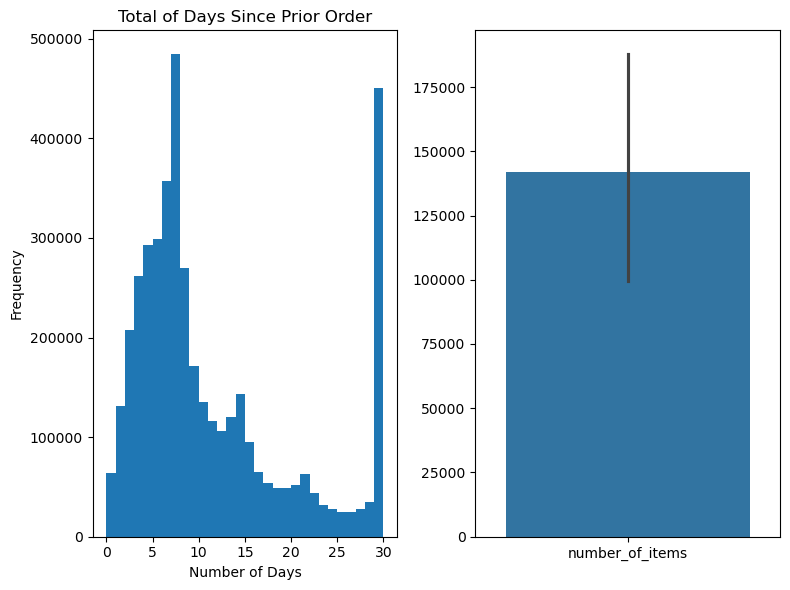

In [115]:
# Instantiating subplots
fig, axs = plt.subplots(1,2,figsize=(8,6))

# Plotting distribution of for number of days between returning customer orders
ax = axs[0]
df[df['days_since_prior_order']!="first order"]["days_since_prior_order"].plot(
    kind = 'hist', 
    xlabel='Number of Days', 
    title="Total of Days Since Prior Order",
    bins=30,
    ax = ax
    )

# Plotting order size per hour
avg_size = df.groupby("days_since_prior_order")["product_id"].count().reset_index().rename(
    columns = {
        "product_id" : "number_of_items"
    }
) # Grouped for plot data

ax = axs[1]
sns.barplot(
    y= avg_size["number_of_items"],
    ax = ax
)    

plt.tight_layout()
plt.show()

In [108]:
df[df["days_since_prior_order"] == 7.0]["product_name"].value_counts()

product_name
banana                                                                             7962
bag of organic bananas                                                             5974
organic strawberries                                                               4033
organic baby spinach                                                               3681
organic hass avocado                                                               3274
                                                                                   ... 
chili con carne                                                                       1
signature shredded steak & cheese chimichanga                                         1
sandwich spread                                                                       1
green chilly beef & bean                                                              1
made with organic pasta & cheddar cheese number shapes macaroni & cheese dinner       1
Name: count, Length

The figure depicts a bimodal distribution, with 7 and 30 days between orders being the 2 modes. This entails subsets of customers driving these numbers, likely family households and 

Let's see if we find any difference between the distribution of the number of orders by the hour on Wednesdays and Saturdays

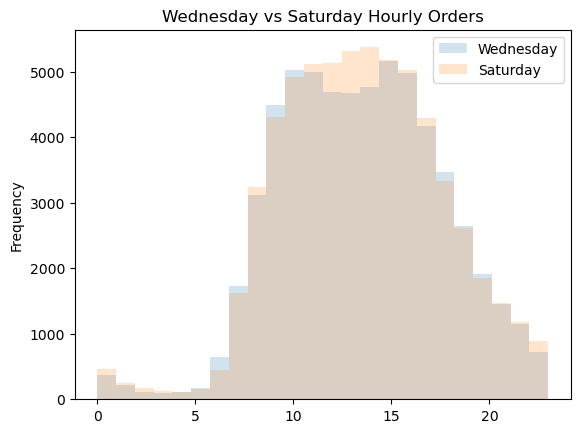

In [55]:
# Plotting the distribution of `order_hour_of_day` on Wednesdays
df[df['order_dow']==3]['order_hour_of_day'].plot(
    bins = 24,
    kind = 'hist',
    title = "Wednesday vs Saturday Hourly Orders", 
    xlabel = 'Time of Day', 
    alpha = .2
)

# Plotting the distribution of `order_hour_of_day` on Saturdays
df[df['order_dow']==6]['order_hour_of_day'].plot(
    bins = 24,
    kind = 'hist',
    alpha = .2
)

plt.legend(labels=['Wednesday','Saturday'])
plt.show()

Here we see that Wednesday and Saturday orders by the hour are very similar, almost identical. Main difference is the number of Saturday orders between 11AM-2PM peak higher than Wednesday orders in those hours.

We'll plot the distribution of orders per customer

<Axes: title={'center': 'Number of Orders/Customer'}, ylabel='Frequency'>

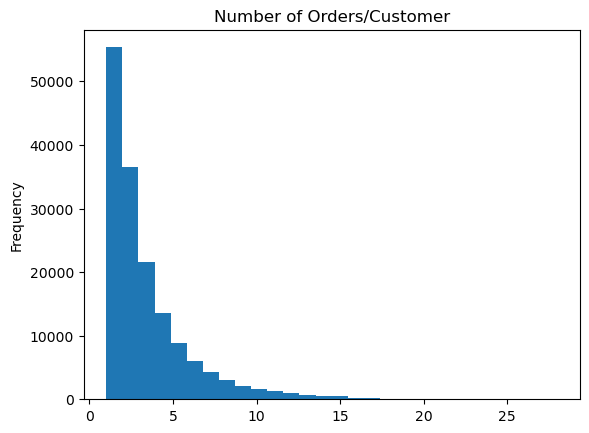

In [56]:
order_count = df.groupby('user_id')['order_id'].count()
order_count.plot(kind='hist', bins=28, title='Number of Orders/Customer')

Here we see most users are only placing one order with an overwhelming majority. These customers either don't have an account to track or there might be an underlying issue that could be leaving customers dissatisfied. Shoudl be investigated further with questionaires and/or surveys with incentives.

Let now check to seee which are the top selling products

In [57]:
# Merging `order_prod_df` with `porducts_df` to get both values
product_stats = order_prod_df.merge(products_df, on='product_id')

# Isolating the relevant columns
product_stats.iloc[:,[1,4]].value_counts().head(20)                     

product_id  product_name            
24852       banana                      66050
13176       bag of organic bananas      53297
21137       organic strawberries        37039
21903       organic baby spinach        33971
47209       organic hass avocado        29773
47766       organic avocado             24689
47626       large lemon                 21495
16797       strawberries                20018
26209       limes                       19690
27845       organic whole milk          19600
27966       organic raspberries         19197
22935       organic yellow onion        15898
24964       organic garlic              15292
45007       organic zucchini            14584
39275       organic blueberries         13879
49683       cucumber kirby              13675
28204       organic fuji apple          12544
5876        organic lemon               12232
8277        apple honeycrisp organic    11993
40706       organic grape tomatoes      11781
Name: count, dtype: int64

We've retrieved the top 20 popular products. Seeing all values consist of fruits and vegetables indicate a trend in a healthy diet and lifestyle.

Let's analyze the ditribution of items in each order

In [60]:
# Grouping `order_id` with `product_id` for product count in each order
order_total = order_prod_df.groupby('order_id')['product_id'].count()

In [61]:
# Viewing the number of occurances of each value
order_total.value_counts()

product_id
5      31923
6      31698
4      31054
7      30822
3      29046
       ...  
72         1
87         1
85         1
127        1
115        1
Name: count, Length: 90, dtype: int64

<Axes: title={'center': 'Number of Items/Order'}, ylabel='Frequency'>

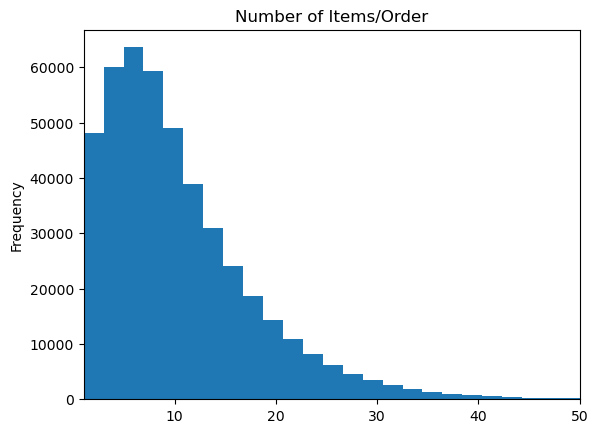

In [62]:
# Plotting distribution of the number of items in each order
order_total.plot(kind='hist',bins=64, title='Number of Items/Order', xlim=[1,50])

The distribution is heavily skewed to the right. Most orders include less than 11 items. There are orders with over 40 items. How can we get those number to skew this data the other way. Possibly highlighting ongoing sales in grocery stores within the customer's area or stores with recommended items.

Let's find the top 20 reordered items

In [63]:
# Filtering the rows with positive values in the `reordered` column
reorders = order_prod_df[order_prod_df['reordered']==1]

In [64]:
# Merging the filtered dataset with `products_df` with matching `product_id` values
top_reorder = reorders.merge(products_df,on='product_id')

In [65]:
# Isolating the relevant columns
top_reorder.iloc[:,[1,4]].value_counts().head(20)

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
Name: count, dtype: int64

The top twenty reordered items support the thesis on the trend of healthy lifestyle and healthy diets.

Next let's dig a bit deeper and see the proportion of orders are reorders for each product

In [66]:
# Grouping products with positive and negative `reorder` values
proportion = product_stats.groupby('product_name')['reordered'].value_counts(dropna=False)

In [57]:
# Checking the proportion of items and its respective reorders
proportion.head(10)

product_name                                   reordered
#2 coffee filters                              0            82
                                               1            28
#2 cone white coffee filters                   0             2
#2 mechanical pencils                          0             3
#4 natural brown coffee filters                0            25
                                               1            14
& go! hazelnut spread + pretzel sticks         0             8
                                               1             7
(70% juice!) mountain raspberry juice squeeze  1             4
+energy black cherry vegetable & fruit juice   0             4
Name: reordered, dtype: int64

Items that only have first orders (represented by the value 0) diplayed do not have any reorders. Items that don't have any listed first orders (represented by the value 1) are only reorders.

In [58]:
order_prod_df[order_prod_df['product_id']==26685]

,order_id,product_id,add_to_cart_order,reordered
563201,558134,26685,5,0
2590673,693035,26685,3,0
4369653,1828499,26685,1,0


Let's check out the proportions of products ordered are reorders for each customer

In [67]:
# Merging dataframes to include order data with product info
user_stats = orders_df.merge(order_prod_df,on='order_id')

In [68]:
# Grouping the `user_id` with `reordered` values and getting the value counts
grp = user_stats.groupby('user_id')['reordered'].value_counts()

In [69]:
grp.head(10)

user_id  reordered
2        0            25
         1             1
4        0             2
5        1             8
         0             4
6        0             4
7        1            13
         0             1
11       0            12
         1             3
Name: count, dtype: int64

We'll now check to see which are the top 20 items customers place in their carts first

In [72]:
# Filtering dataset to include only rowns with `add_to_cart_order` values equal to 0
top_first = product_stats[product_stats['add_to_cart_order']==0]

In [73]:
top_first['product_name'].value_counts().head(20)

product_name
sea salt & vinegar potato chips                                      4
organic dried granny apple chips                                     4
organic strawberries                                                 4
banana                                                               4
ancient grain blueberry hemp granola                                 4
seedless red grapes                                                  3
whole wheat cookies dark chocolate                                   3
sour cream & onion potato chips                                      3
organic bread with 21 whole grains                                   3
organic raspberries                                                  3
organic red onion                                                    3
barista blend pure almond milk                                       3
gluten free dark chocolate chunk chewy with a crunch granola bars    3
organic whole string cheese                                     

Here we see a lot of the top 20 popular products on the list. None really stand out. Besides the salt & vinegar chips, all looks pretty healthy choices

## Conclusion <a id='hypotheses'></a>

The research shows clear and consistent patterns in their shopping habits. We found that customers have healthy eating habits for the most part. We can also get an idea of who our customer base demographic. Organic foods and a healthy lifestyle can be costly, indicating high income brackets. The hours the most orders are made may also indicate the customer base work from home or are stay-at-home spouses. Reviewing the proportions of reorders can be a great way to see which products customers do not like and can be replaced with more popular products to drive more sales. The data studied was 100% of the original set so we are confident in our findings.  